In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import json
import plotly.express as px

## The Data
Map Shapefiles/GIS data has been downloaded from https://www.arcgis.com/home/item.html?id=cba8bddfa0ab43ddb35a7313376f9438, uploaded by Vijay Meena.

Regarding the map-plots produced in this notebook (bit of a spoiler, clearly written after finishing the notebook) - the static maps are visible here, but the Plotly maps (in html format, needs to be downloaded and opened in any browser) have been moved to https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB due to notebook size restrictions. Each Plotly map was adding roughly 600 MB to the size of the notebook - github allows each file to be 100 MB max, and has trouble showing notebooks with size close to 30 MB. Separating the Plotly maps from notebook/github also allowed me to create more of them - there are 3 animated ones for feature comparison in each district, and 1 each for the 3 clustering models that we have.

In [2]:
shapefile_path = 'GIS/commondata/ind_adm_shp/IND_adm2.shp'
df_map = gpd.read_file(shapefile_path)
df_map.info()
df_map.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID_0       667 non-null    int64   
 1   ISO        667 non-null    object  
 2   NAME_0     667 non-null    object  
 3   ID_1       667 non-null    int64   
 4   NAME_1     667 non-null    object  
 5   ID_2       667 non-null    int64   
 6   NAME_2     667 non-null    object  
 7   HASC_2     626 non-null    object  
 8   CCN_2      667 non-null    int64   
 9   CCA_2      0 non-null      float64 
 10  TYPE_2     667 non-null    object  
 11  ENGTYPE_2  667 non-null    object  
 12  NL_NAME_2  0 non-null      float64 
 13  VARNAME_2  198 non-null    object  
 14  geometry   667 non-null    geometry
dtypes: float64(2), geometry(1), int64(4), object(8)
memory usage: 78.3+ KB


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Nicobar Islands,IN.AN.NI,0,NaN,District,District,NaN,NaN,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
1,105,IND,India,1,Andaman and Nicobar,2,North and Middle Andaman,IN.AN.NM,0,NaN,District,District,NaN,NaN,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
2,105,IND,India,1,Andaman and Nicobar,3,South Andaman,IN.AN.SA,0,NaN,District,District,NaN,NaN,"MULTIPOLYGON (((93.83970 12.32082, 93.85775 12..."
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,IN.AD.AN,0,NaN,District,District,NaN,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,IN.AD.CH,0,NaN,District,District,NaN,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."


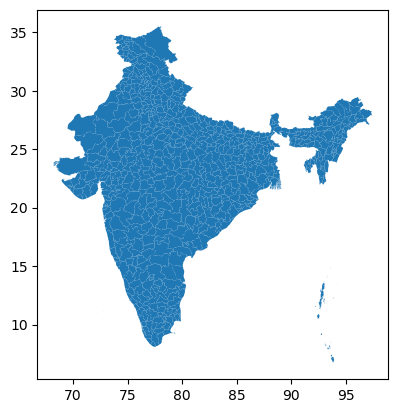

In [3]:
df_map.plot()
plt.show()

This looks like a complete map. Next, let's load the districts and clusters information preserved in IndianDistricts_DataClusters.csv file. I don't need the whole data though - just names of states, districts and their assigned cluster information.

In [4]:
# data_loader = np.load('IndianDistricts_DataClusters_MultiIndexedColumns.npz', allow_pickle = True)
# df_districts_wCluster = pd.DataFrame(
#     data = data_loader['data'],
#     columns = pd.MultiIndex.from_tuples(data_loader['columns'],
#                                         names = data_loader['columns_names'])
# )
# df_districts_wCluster.info()
# df_districts_wCluster

In [5]:
df_districts_wCluster = pd.read_csv('IndianDistricts_DataClusters.csv')
df_districts_wCluster.info()
df_districts_wCluster

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     640 non-null    object 
 1   StateName                640 non-null    object 
 2   Female_pct_1901          640 non-null    float64
 3   Female_pct_1911          640 non-null    float64
 4   Female_pct_1921          640 non-null    float64
 5   Female_pct_1931          640 non-null    float64
 6   Female_pct_1941          640 non-null    float64
 7   Female_pct_1951          640 non-null    float64
 8   Female_pct_1961          640 non-null    float64
 9   Female_pct_1971          640 non-null    float64
 10  Female_pct_1981          640 non-null    float64
 11  Female_pct_1991          640 non-null    float64
 12  Female_pct_2001          640 non-null    float64
 13  Female_pct_2011          640 non-null    float64
 14  Pct_var_since_last_1911  6

,Name,StateName,Female_pct_1901,Female_pct_1911,Female_pct_1921,Female_pct_1931,Female_pct_1941,Female_pct_1951,Female_pct_1961,Female_pct_1971,...,AvgPopGrowth,AvgFemPct,FemaleMWpct_Rural,FemaleMWpct_Urban,MaleMWpct_Rural,MaleMWpct_Urban,TotMWpct,Label_KME5,Label_KMC6,Label_HCC7
0,NICOBARS,ANDAMANNICOBARISLANDS,45.676547,45.191653,43.464193,46.835938,47.108898,47.364477,46.576942,43.937226,...,18.480369,45.540005,4.421584,0.000000,20.655773,0.000000,25.077357,3,5,0
1,NORTHMIDDLEANDAMAN,ANDAMANNICOBARISLANDS,16.430919,16.468341,12.700029,25.832547,30.224924,32.841328,34.627797,40.606656,...,35.130811,32.886754,4.471718,0.172353,22.079226,0.606078,27.329375,0,5,1
2,SOUTHANDAMAN,ANDAMANNICOBARISLANDS,16.428764,16.457449,12.705667,25.825851,30.234512,32.846715,36.285068,36.515563,...,39.406520,32.129755,2.017284,4.121491,10.663386,17.261970,34.064130,0,5,1
3,ADILABAD,ANDHRAPRADESH,49.767194,49.394224,48.837121,48.886006,49.342754,50.193963,49.514115,49.387898,...,18.030833,49.503822,12.154650,1.640973,14.910630,5.586270,34.292522,4,4,2
4,NIZAMABAD,ANDHRAPRADESH,50.144858,50.145012,50.402421,49.755365,49.843247,50.463793,50.176476,49.965354,...,13.508681,50.254258,14.581425,1.949411,15.882077,4.666851,37.079764,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,HAORA,WESTBENGAL,48.322426,47.149980,46.345559,45.482483,44.076443,44.754939,44.694397,45.446464,...,17.470092,46.308916,1.111313,2.528603,8.490506,16.357036,28.487459,0,5,0
636,KOLKATA,WESTBENGAL,34.895079,33.820707,33.464912,32.725302,31.961330,37.224127,38.639970,39.841858,...,16.174832,38.538611,0.000000,5.691381,0.000000,26.006462,31.697843,0,0,0
637,SOUTHTWENTYFOURPARGANAS,WESTBENGAL,48.116473,47.208953,46.564336,46.404160,45.843134,46.258002,47.943863,47.826976,...,20.782149,47.473110,1.852619,0.998142,13.772609,5.932533,22.555903,3,5,0
638,PASCHIMMEDINIPUR,WESTBENGAL,50.155053,49.995968,49.762899,49.375544,48.860737,48.980004,48.792453,48.631590,...,13.656078,49.185827,3.539994,0.518090,16.680209,2.737485,23.475777,2,3,4


## Data Cleaning
Right off the bat, I can see that the number of rows don't match. Both (map and cluster) datasets are supposed to have one row for each district (the GIS files also contain another shapefile with Tehsil level granularity, which I don't need for now). So, mismatch in number of rows means that there are some differences, which we need to reconcile in order to plot our cluster information on this map.

I'll look at the state names first, and then the district names. I will first need to bring both datasets at similar naming convention - I have been following all caps, no space setup throughout the project (names in cluster dataset follow that as well) - I'll continue that. I don't need to touch the existing columns of map dataset - I'll use new columns for this reconciliation task.

In [6]:
def clean_Names(name_frm_df: str) -> str:
    '''
        the input Name may contain spaces and extra characters
        output should be cleaned of all that (including spaces between words)
        and converted to all upercase words
    '''
    name_frm_df = name_frm_df.replace(' and ', ' ')
    # replacing and with space, to be removed in the next line
    cleaned_name = ''.join([character.upper() for character in name_frm_df \
                            if character.isalpha()])
    return cleaned_name

df_map['StateName'] = df_map['NAME_1'].apply(clean_Names)
df_map['DistrictName'] = df_map['NAME_2'].apply(clean_Names)

In [7]:
# let's see whether we have any differnce in state names between the 2 datasets
map_state_set = set(df_map['StateName'])
clusters_state_set = set(df_districts_wCluster['StateName'])
map_state_set == clusters_state_set

False

In [8]:
# let's see the scale of the differences
print(map_state_set - clusters_state_set)
print(clusters_state_set - map_state_set)

{'TELANGANA', 'PUDUCHERRY', 'ANDAMANNICOBAR'}
{'PUDUCHERRYUT', 'ANDAMANNICOBARISLANDS'}


Puducherry and Andaman & Nicobar are just different names - I'll let cluster name override map name. Telengana was formed after 2011 census by bifurcating AndhraPradesh. So, the districts in current Telengana were part of erstwhile AndhraPradesh - I'll rename Telengana to AndhraPradesh in maps dataset, so that, district mapping remains same as much as possible.

I'll follow this for the rest of the task as well - I have cluster information for states and districts as per what Census 2011 had. So, that is our master set (dataset df_districts_wCluster in our case) and we modify/manipulate maps dataset as much as possible (without violating the overall map structure) to match the cluster dataset.

In [9]:
# map name : cluster name
state_name_mapping = {
    'PUDUCHERRY' : 'PUDUCHERRYUT',
    'ANDAMANNICOBAR' : 'ANDAMANNICOBARISLANDS',
    'TELANGANA' : 'ANDHRAPRADESH'
}

for map_state_name, cluster_state_name in state_name_mapping.items():
    df_map['StateName'] = df_map['StateName'].replace(map_state_name, cluster_state_name)

In [10]:
# confirming that state names match in these 2 datasets now
map_state_set = set(df_map['StateName'])
clusters_state_set = set(df_districts_wCluster['StateName'])
map_state_set == clusters_state_set

True

Now, I'll look at the district names. Since, multiple states can have districts with same name, it's important to always look at a combination of state names and district names.

In [11]:
map_state_dist_set = set(zip(df_map['StateName'], df_map['DistrictName']))
cluster_state_dist_set = set(zip(df_districts_wCluster['StateName'],
                                 df_districts_wCluster['Name']))
map_state_dist_set == cluster_state_dist_set

False

In [12]:
# let's see the scale of the differences
print(map_state_dist_set - cluster_state_dist_set)
print(cluster_state_dist_set - map_state_dist_set)

{('MIZORAM', 'LAWANGTLAI'), ('ODISHA', 'BAUDA'), ('MAHARASHTRA', 'MUMBAICITY'), ('WESTBENGAL', 'NORTHPARGANAS'), ('JAMMUKASHMIR', 'BARAMULLA'), ('CHHATTISGARH', 'SUKMA'), ('ARUNACHALPRADESH', 'NAMSAI'), ('CHHATTISGARH', 'SURAJPUR'), ('WESTBENGAL', 'SOUTHPARGANAS'), ('KARNATAKA', 'CHAMRAJNAGAR'), ('PUNJAB', 'PATHANKOT'), ('UTTARPRADESH', 'SAMBHAL'), ('ANDHRAPRADESH', 'NELLORE'), ('MADHYAPRADESH', 'WESTNIMAR'), ('BIHAR', 'KAIMUR'), ('GUJARAT', 'CHHOTAUDAIPUR'), ('CHHATTISGARH', 'BALRAMPUR'), ('TRIPURA', 'UNOKOTI'), ('SIKKIM', 'EASTSIKKIM'), ('CHHATTISGARH', 'DANTEWADA'), ('ARUNACHALPRADESH', 'LONGDING'), ('MEGHALAYA', 'NORTHGAROHILLS'), ('UTTARPRADESH', 'HAPUR'), ('TAMILNADU', 'NAGAPPATTINAM'), ('CHHATTISGARH', 'BALODABAZAR'), ('MEGHALAYA', 'SOUTHWESTKHASIHILLS'), ('WESTBENGAL', 'PASHCHIMMEDINIPUR'), ('GUJARAT', 'DEVBHUMIDWARKA'), ('JAMMUKASHMIR', 'POONCH'), ('MADHYAPRADESH', 'AGARMALWA'), ('UTTARPRADESH', 'SHRAVASTI'), ('UTTARPRADESH', 'KASGANJ'), ('CHHATTISGARH', 'BEMETARA'), ('TRIPURA

This list is quite huge. Similar to what I did for state names, cluster district names will mostly override map district names. But unlike what I did for state names, I'll have to organize the lists above to better recognize the cause of discrepancy for each mismatch. Next block of code tries to show the difference in district names organized by each state - some differences are just due to using a different name (spelling mismatch), others require more investigation.

I'll use a dictionary (dist_name_mapping) to store all the state-district combinations (as keys) from map dataset that don't match clusters dataset - and then I have to take a call on what to map them to and manually update them in the dictionary.

In [13]:
map_diff = map_state_dist_set - cluster_state_dist_set
# set of names that are in the map dataset but no matching record in the cluster dataset
cluster_diff = cluster_state_dist_set - map_state_dist_set
# set of names that are in the cluster dataset but no matching record in the map dataset

map_diff_orgbystate = {}
# dictionary to store all the districts in map dataset that didn't match with
# cluster dataset, organised as per state names. state name will be key,
# value would be a list of differing district names for that state

for state, dist in map_diff:
    if state in map_diff_orgbystate.keys():
        map_diff_orgbystate[state].append(dist)
    else:
        map_diff_orgbystate[state] = [dist]

cluster_diff_orgbystate = {}
# dictionary to store all the districts in cluster dataset that didn't match with
# map dataset, organised as per state names. state name will be key,
# value would be a list of differing district names for that state

for state, dist in cluster_diff:
    if state in cluster_diff_orgbystate.keys():
        cluster_diff_orgbystate[state].append(dist)
    else:
        cluster_diff_orgbystate[state] = [dist]


dist_name_mapping = {}
# dictionary to store all the names in map dataset that didn't match cluster dataset.
# state, district name tuple is the key, value will be the new district name
# that would match cluster dataset. value will be updated later

cluster_map_matchingstates = []
# list to keep track of all the differing states, will be used later to verify
# that we traversed through the difference in both the sets

for map_state in map_diff_orgbystate.keys():
    # print all the mismatching districts in map dataset for current state
    print('STATE : ', map_state)
    print('District mismatch in MAP set : ', map_diff_orgbystate[map_state])
    
    # print all the mismatching districts in cluster dataset for same state, if any
    if (map_state in cluster_diff_orgbystate.keys()):
        print('District mismatch in CLUSTER set : ', cluster_diff_orgbystate[map_state])
        cluster_map_matchingstates.append(map_state)
    else:
        print('No corresponding mismatch in CLUSTER set...')     
    # store state, district tuple as key in the correction dict, correction values yet to be decided
    for map_dist in map_diff_orgbystate[map_state]:
        dist_name_mapping[(map_state, map_dist)] = ''
        
# check for state names unique to cluster difference dict
# by validating against which states' diff has already been printed
for cluster_state in cluster_diff_orgbystate.keys():
    if (cluster_state not in cluster_map_matchingstates):
        print('STATE : ', cluster_state)
        print('District mismatch in CLUSTER set : ', cluster_diff_orgbystate[cluster_state])
        print('No corresponding mismatch in MAP set...')

STATE :  MIZORAM
District mismatch in MAP set :  ['LAWANGTLAI']
District mismatch in CLUSTER set :  ['LAWNGTLAI']
STATE :  ODISHA
District mismatch in MAP set :  ['BAUDA']
District mismatch in CLUSTER set :  ['BAUDH']
STATE :  MAHARASHTRA
District mismatch in MAP set :  ['MUMBAICITY', 'PALGHAR', 'GARHCHIROLI']
District mismatch in CLUSTER set :  ['GADCHIROLI', 'MUMBAI']
STATE :  WESTBENGAL
District mismatch in MAP set :  ['NORTHPARGANAS', 'SOUTHPARGANAS', 'PASHCHIMMEDINIPUR', 'ALIPURDUAR']
District mismatch in CLUSTER set :  ['PASCHIMMEDINIPUR', 'NORTHTWENTYFOURPARGANAS', 'SOUTHTWENTYFOURPARGANAS']
STATE :  JAMMUKASHMIR
District mismatch in MAP set :  ['BARAMULLA', 'POONCH']
District mismatch in CLUSTER set :  ['PUNCH', 'BARAMULA']
STATE :  CHHATTISGARH
District mismatch in MAP set :  ['SUKMA', 'SURAJPUR', 'BALRAMPUR', 'DANTEWADA', 'BALODABAZAR', 'BEMETARA', 'MUNGELI', 'KONDAGAON', 'BALOD', 'GARIABAND']
District mismatch in CLUSTER set :  ['DAKSHINBASTARDANTEWADA']
STATE :  ARUNACHALPR

In [14]:
print('Map Dataset Modification Keys :')
for state, dist in dist_name_mapping.keys():
    print('(\'{}\', \'{}\')'.format(state, dist))
print(f'Total Number of Keys to Fill : {len(dist_name_mapping)}')

Map Dataset Modification Keys :
('MIZORAM', 'LAWANGTLAI')
('ODISHA', 'BAUDA')
('MAHARASHTRA', 'MUMBAICITY')
('MAHARASHTRA', 'PALGHAR')
('MAHARASHTRA', 'GARHCHIROLI')
('WESTBENGAL', 'NORTHPARGANAS')
('WESTBENGAL', 'SOUTHPARGANAS')
('WESTBENGAL', 'PASHCHIMMEDINIPUR')
('WESTBENGAL', 'ALIPURDUAR')
('JAMMUKASHMIR', 'BARAMULLA')
('JAMMUKASHMIR', 'POONCH')
('CHHATTISGARH', 'SUKMA')
('CHHATTISGARH', 'SURAJPUR')
('CHHATTISGARH', 'BALRAMPUR')
('CHHATTISGARH', 'DANTEWADA')
('CHHATTISGARH', 'BALODABAZAR')
('CHHATTISGARH', 'BEMETARA')
('CHHATTISGARH', 'MUNGELI')
('CHHATTISGARH', 'KONDAGAON')
('CHHATTISGARH', 'BALOD')
('CHHATTISGARH', 'GARIABAND')
('ARUNACHALPRADESH', 'NAMSAI')
('ARUNACHALPRADESH', 'LONGDING')
('KARNATAKA', 'CHAMRAJNAGAR')
('KARNATAKA', 'CHIKBALLAPURA')
('PUNJAB', 'PATHANKOT')
('PUNJAB', 'FAZILKA')
('UTTARPRADESH', 'SAMBHAL')
('UTTARPRADESH', 'HAPUR')
('UTTARPRADESH', 'SHRAVASTI')
('UTTARPRADESH', 'KASGANJ')
('UTTARPRADESH', 'AMROHA')
('UTTARPRADESH', 'HATHRAS')
('UTTARPRADESH', 'AM

In [15]:
# mismatches caused by spelling, or using a different (shorter or fuller)
# name of the same place in the map dataset
dist_name_mapping[('ANDHRAPRADESH', 'NELLORE')] = 'SRIPOTTISRIRAMULUNELLORE'

dist_name_mapping[('UTTARPRADESH', 'SHRAVASTI')] = 'SHRAWASTI'
dist_name_mapping[('UTTARPRADESH', 'LAKHIMPURKHERI')] = 'KHERI'
dist_name_mapping[('UTTARPRADESH', 'MAHARAJGANJ')] = 'MAHRAJGANJ'
dist_name_mapping[('UTTARPRADESH', 'SANTRAVIDASNAGAR')] = 'SANTRAVIDASNAGARBHADOHI'

dist_name_mapping[('GUJARAT', 'DAHOD')] = 'DOHAD'

dist_name_mapping[('MAHARASHTRA', 'MUMBAICITY')] = 'MUMBAI'
dist_name_mapping[('MAHARASHTRA', 'GARHCHIROLI')] = 'GADCHIROLI'

dist_name_mapping[('CHHATTISGARH', 'DANTEWADA')] = 'DAKSHINBASTARDANTEWADA'

dist_name_mapping[('ANDAMANNICOBARISLANDS', 'NICOBARISLANDS')] = 'NICOBARS'

dist_name_mapping['WESTBENGAL', 'NORTHPARGANAS'] = 'NORTHTWENTYFOURPARGANAS'
dist_name_mapping[('WESTBENGAL', 'PASHCHIMMEDINIPUR')] = 'PASCHIMMEDINIPUR'
dist_name_mapping[('WESTBENGAL', 'SOUTHPARGANAS')] = 'SOUTHTWENTYFOURPARGANAS'

dist_name_mapping[('BIHAR', 'KAIMUR')] = 'KAIMURBHABUA'

dist_name_mapping[('MADHYAPRADESH', 'EASTNIMAR')] = 'KHANDWAEASTNIMAR'
dist_name_mapping[('MADHYAPRADESH', 'WESTNIMAR')] = 'KHARGONEWESTNIMAR'

dist_name_mapping[('SIKKIM', 'SOUTHSIKKIM')] = 'SOUTHDISTRICT'
dist_name_mapping[('SIKKIM', 'NORTHSIKKIM')] = 'NORTHDISTRICT'
dist_name_mapping[('SIKKIM', 'EASTSIKKIM')] = 'EASTDISTRICT'
dist_name_mapping[('SIKKIM', 'WESTSIKKIM')] = 'WESTDISTRICT'

dist_name_mapping[('KARNATAKA', 'CHIKBALLAPURA')] = 'CHIKKABALLAPURA'
dist_name_mapping[('KARNATAKA', 'CHAMRAJNAGAR')] = 'CHAMARAJANAGAR'

dist_name_mapping[('TAMILNADU', 'VIRUDUNAGAR')] = 'VIRUDHUNAGAR'
dist_name_mapping[('TAMILNADU', 'NAGAPPATTINAM')] = 'NAGAPATTINAM'

dist_name_mapping[('JAMMUKASHMIR', 'POONCH')] = 'PUNCH'
dist_name_mapping[('JAMMUKASHMIR', 'BARAMULLA')] = 'BARAMULA'

dist_name_mapping[('ODISHA', 'BAUDA')] = 'BAUDH'

dist_name_mapping[('MIZORAM', 'LAWANGTLAI')] = 'LAWNGTLAI'

filled, yet_to_be_filled = 0, 0
for new_dist in dist_name_mapping.values():
    if (new_dist == ''):
        yet_to_be_filled += 1
    else:
        filled += 1
print(f'{filled} keys filled, {yet_to_be_filled} to go.')

28 keys filled, 37 to go.


The remaining names in the correction dict are mostly newly formed or renamed districts. For renamed districts I obviously want to map them to the older names. For newly formed districts, which used to be part of another older district, I would again want to map the newer district to the older one. This becomes tricky when a district was formed by joining parts of multiple districts - I have used new district's administrative city (in which district it was located before the division) or which old district contributed more to the newly formed district (where that information was available) to decide on the mappings. More details can be found in the Notes4NewDistrictsMapping.txt file. We will deal with 'NCTOFDELHI' districts (mismatch unique to cluster dataset) separately.

In [16]:
dist_name_mapping[('UTTARPRADESH', 'KASGANJ')] = 'KANSHIRAMNAGAR'
dist_name_mapping[('UTTARPRADESH', 'SAMBHAL')] = 'MORADABAD'
dist_name_mapping[('UTTARPRADESH', 'AMETHI')] = 'SULTANPUR'
dist_name_mapping[('UTTARPRADESH', 'AMROHA')] = 'JYOTIBAPHULENAGAR'
dist_name_mapping[('UTTARPRADESH', 'HAPUR')] = 'GHAZIABAD'
dist_name_mapping[('UTTARPRADESH', 'SHAMLI')] = 'MUZAFFARNAGAR'
dist_name_mapping[('UTTARPRADESH', 'HATHRAS')] = 'MAHAMAYANAGAR'

dist_name_mapping[('CHHATTISGARH', 'BALOD')] = 'DURG'
dist_name_mapping[('CHHATTISGARH', 'SURAJPUR')] = 'SURGUJA'
dist_name_mapping[('CHHATTISGARH', 'SUKMA')] = 'DAKSHINBASTARDANTEWADA'
dist_name_mapping[('CHHATTISGARH', 'MUNGELI')] = 'BILASPUR'
dist_name_mapping[('CHHATTISGARH', 'BALODABAZAR')] = 'RAIPUR'
dist_name_mapping[('CHHATTISGARH', 'KONDAGAON')] = 'BASTAR'
dist_name_mapping[('CHHATTISGARH', 'BALRAMPUR')] = 'SURGUJA'
dist_name_mapping[('CHHATTISGARH', 'BEMETARA')] = 'DURG'
dist_name_mapping[('CHHATTISGARH', 'GARIABAND')] = 'RAIPUR'

dist_name_mapping[('TRIPURA', 'KHOWAI')] = 'WESTTRIPURA'
dist_name_mapping[('TRIPURA', 'UNOKOTI')] = 'NORTHTRIPURA'
dist_name_mapping[('TRIPURA', 'SIPAHIJALA')] = 'WESTTRIPURA'
dist_name_mapping[('TRIPURA', 'GOMATI')] = 'SOUTHTRIPURA'

dist_name_mapping[('PUNJAB', 'FAZILKA')] = 'FIROZPUR'
dist_name_mapping[('PUNJAB', 'PATHANKOT')] = 'GURDASPUR'

dist_name_mapping[('ARUNACHALPRADESH', 'NAMSAI')] = 'LOHIT'
dist_name_mapping[('ARUNACHALPRADESH', 'LONGDING')] = 'TIRAP'

dist_name_mapping[('MADHYAPRADESH', 'AGARMALWA')] = 'SHAJAPUR'

dist_name_mapping[('GUJARAT', 'MAHISAGAR')] = 'PANCHMAHALS'
dist_name_mapping[('GUJARAT', 'MORBI')] = 'RAJKOT'
dist_name_mapping[('GUJARAT', 'BOTAD')] = 'BHAVNAGAR'
dist_name_mapping[('GUJARAT', 'DEVBHUMIDWARKA')] = 'JAMNAGAR'
dist_name_mapping[('GUJARAT', 'CHHOTAUDAIPUR')] = 'VADODARA'
dist_name_mapping[('GUJARAT', 'ARAVALLI')] = 'SABARKANTHA'
dist_name_mapping[('GUJARAT', 'GIRSOMNATH')] = 'JUNAGADH'

dist_name_mapping[('MEGHALAYA', 'SOUTHWESTKHASIHILLS')] = 'WESTKHASIHILLS'
dist_name_mapping[('MEGHALAYA', 'NORTHGAROHILLS')] = 'EASTGAROHILLS'
dist_name_mapping[('MEGHALAYA', 'SOUTHWESTGAROHILLS')] = 'WESTGAROHILLS'

dist_name_mapping[('WESTBENGAL', 'ALIPURDUAR')] = 'JALPAIGURI'

dist_name_mapping[('MAHARASHTRA', 'PALGHAR')] = 'THANE'

filled, yet_to_be_filled = 0, 0
for new_dist in dist_name_mapping.values():
    if (new_dist == ''):
        yet_to_be_filled += 1
    else:
        filled += 1
print(f'{filled} keys filled, {yet_to_be_filled} to go.')

65 keys filled, 0 to go.


Now, let me 'correct' them in the map dataset.

In [17]:
for (map_state_name, map_dist_name), cluster_dist in dist_name_mapping.items():
    df_map.loc[((df_map['StateName'] == map_state_name) &\
                (df_map['DistrictName'] == map_dist_name)),\
               'DistrictName'] = cluster_dist

Coming to the situation with 'NCOFDELHI' (mismatch unique to cluster dataset), we have 9 districts within NCT of Delhi in our cluster dataset - and these 9 districts have been assigned to different clusters by K-Means, but the map dataset has covered the whole Delhi in a single district (if it didn't cover the whole of Delhi, we would have seen a blank hole in the map earlier). Since we don't want to create new records in the maps dataset (creating geometry would be difficult)- we need to fit the 9 districts' cluster information into a single record and set it in the map dataset. We'll use the most common cluster as the cluster for that one record (let's hope we have a unique one).

In [18]:
df_districts_wCluster.info()
print(df_districts_wCluster.loc[(df_districts_wCluster['StateName'] == 'NCTOFDELHI'),\
                                ['Label_KME5', 'Label_KMC6', 'Label_HCC7']].value_counts())

df_districts_wCluster.loc[(df_districts_wCluster['StateName'] == 'NCTOFDELHI'),\
                          ['Name', 'Label_KME5', 'Label_KMC6', 'Label_HCC7']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     640 non-null    object 
 1   StateName                640 non-null    object 
 2   Female_pct_1901          640 non-null    float64
 3   Female_pct_1911          640 non-null    float64
 4   Female_pct_1921          640 non-null    float64
 5   Female_pct_1931          640 non-null    float64
 6   Female_pct_1941          640 non-null    float64
 7   Female_pct_1951          640 non-null    float64
 8   Female_pct_1961          640 non-null    float64
 9   Female_pct_1971          640 non-null    float64
 10  Female_pct_1981          640 non-null    float64
 11  Female_pct_1991          640 non-null    float64
 12  Female_pct_2001          640 non-null    float64
 13  Female_pct_2011          640 non-null    float64
 14  Pct_var_since_last_1911  6

,Name,Label_KME5,Label_KMC6,Label_HCC7
402,NORTHWEST,3,5,1
403,NORTH,0,0,0
404,NORTHEAST,3,5,1
405,EAST,3,5,1
406,NEWDELHI,0,0,0
407,CENTRAL,0,0,0
408,WEST,3,5,1
409,SOUTHWEST,3,5,1
410,SOUTH,3,5,1


In [19]:
df_map[df_map['StateName'] == 'NCTOFDELHI']

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,StateName,DistrictName
415,105,IND,India,25,NCT of Delhi,415,West,IN.DL.WE,0,NaN,District,District,NaN,NaN,"POLYGON ((77.32713 28.68516, 77.32539 28.68250...",NCTOFDELHI,WEST


This is interesting - 6 of the 9 districts in Delhi always fell under the same cluster, and the same is true for the other 3 districts - no matter what model I used. This lends credibility to all the models. Anyway, since we have a clear majority, I can mark the whole of Delhi with the dominating cluster - we're losing some information here, but that's the compromise I have to make to use this map.

I'll keep just the West district record in cluster dataset, since that is what we have in maps dataset. The West record in cluster dataset already contains the most common label(s) - so, fortunately we just need to remove rest of the Delhi districts from cluster dataset, and that takes care of it.

In [20]:
# removing these 8 NCT of Delhi districts, keeping just West
df_districts_wCluster.loc[(df_districts_wCluster['StateName'] == 'NCTOFDELHI') &\
                          (df_districts_wCluster['Name'] != 'WEST')]

,Name,StateName,Female_pct_1901,Female_pct_1911,Female_pct_1921,Female_pct_1931,Female_pct_1941,Female_pct_1951,Female_pct_1961,Female_pct_1971,...,AvgPopGrowth,AvgFemPct,FemaleMWpct_Rural,FemaleMWpct_Urban,MaleMWpct_Rural,MaleMWpct_Urban,TotMWpct,Label_KME5,Label_KMC6,Label_HCC7
402,NORTHWEST,NCTOFDELHI,48.327407,47.672961,46.975951,46.556061,46.139882,46.241858,45.731264,44.705041,...,75.014425,45.247702,0.219497,3.711488,1.373020,24.032206,29.336211,3,5,1
403,NORTH,NCTOFDELHI,45.332582,45.142147,44.939326,44.817144,44.696041,44.725715,43.086251,43.789879,...,7.874108,44.689294,0.057997,3.558872,0.473548,25.767305,29.857722,0,0,0
404,NORTHEAST,NCTOFDELHI,45.578513,45.387044,45.183124,45.060278,44.938519,44.968353,43.090028,43.472040,...,146.893881,44.931735,0.016060,2.339554,0.227558,23.706474,26.289645,3,5,1
405,EAST,NCTOFDELHI,46.465068,46.269875,46.061988,45.936753,45.812625,45.843040,45.639017,45.348951,...,70.770954,45.805709,0.015210,4.775452,0.059028,25.975958,30.825649,3,5,1
406,NEWDELHI,NCTOFDELHI,43.417838,43.235446,43.041193,42.924171,42.808183,42.836604,40.090792,41.370475,...,0.902146,42.801721,0.000000,7.751894,0.000000,30.212529,37.964424,0,0,0
407,CENTRAL,NCTOFDELHI,46.432605,46.237549,46.029807,45.904659,45.780618,45.811012,44.363996,45.064605,...,-2.724502,45.773707,0.000000,4.154417,0.000000,27.186598,31.341015,0,0,0
409,SOUTHWEST,NCTOFDELHI,45.031814,44.842643,44.641168,44.519796,44.399497,44.428974,44.337127,44.172967,...,56.901808,44.392794,0.178634,4.582727,1.433345,25.205651,31.400357,3,5,1
410,SOUTH,NCTOFDELHI,45.276272,45.086074,44.883505,44.761474,44.640522,44.670159,43.887493,44.313983,...,55.666148,44.633783,0.019034,4.608392,0.114498,25.417278,30.159203,3,5,1


In [21]:
df_districts_wCluster = \
df_districts_wCluster.loc[~((df_districts_wCluster['StateName'] == 'NCTOFDELHI')\
                                & (df_districts_wCluster['Name'] != 'WEST'))]
df_districts_wCluster[df_districts_wCluster['StateName'] == 'NCTOFDELHI']

,Name,StateName,Female_pct_1901,Female_pct_1911,Female_pct_1921,Female_pct_1931,Female_pct_1941,Female_pct_1951,Female_pct_1961,Female_pct_1971,...,AvgPopGrowth,AvgFemPct,FemaleMWpct_Rural,FemaleMWpct_Urban,MaleMWpct_Rural,MaleMWpct_Urban,TotMWpct,Label_KME5,Label_KMC6,Label_HCC7
408,WEST,NCTOFDELHI,46.228256,46.034058,45.82723,45.702633,45.579138,45.609398,44.666975,45.476076,...,62.67419,45.572258,0.006763,4.928039,0.055323,26.20654,31.196665,3,5,1


Now let's revalidate whether there is any district mismatch left still.

In [22]:
map_state_dist_set = set(zip(df_map['StateName'], df_map['DistrictName']))
cluster_state_dist_set = set(zip(df_districts_wCluster['StateName'],
                                 df_districts_wCluster['Name']))
map_state_dist_set == cluster_state_dist_set

True

Now that I have resolved all the discrepancies in the names, let's merge these 2 datasets so that we can have a single dataset with both map information (geometry) and cluster labels.

In [23]:
df_map_wCluster = pd.merge(df_map,
                           df_districts_wCluster,
                           left_on = ['StateName', 'DistrictName'],
                           right_on = ['StateName', 'Name'],
                           validate = 'm:1')
# there are multiple records in map dataset for some districts in cluster dataset
# mainly due to our cleaning above
df_map_wCluster.info()
df_map_wCluster

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 667 entries, 0 to 666
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID_0                     667 non-null    int64   
 1   ISO                      667 non-null    object  
 2   NAME_0                   667 non-null    object  
 3   ID_1                     667 non-null    int64   
 4   NAME_1                   667 non-null    object  
 5   ID_2                     667 non-null    int64   
 6   NAME_2                   667 non-null    object  
 7   HASC_2                   626 non-null    object  
 8   CCN_2                    667 non-null    int64   
 9   CCA_2                    0 non-null      float64 
 10  TYPE_2                   667 non-null    object  
 11  ENGTYPE_2                667 non-null    object  
 12  NL_NAME_2                0 non-null      float64 
 13  VARNAME_2                198 non-null    object  
 14  ge

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,...,AvgPopGrowth,AvgFemPct,FemaleMWpct_Rural,FemaleMWpct_Urban,MaleMWpct_Rural,MaleMWpct_Urban,TotMWpct,Label_KME5,Label_KMC6,Label_HCC7
0,105,IND,India,1,Andaman and Nicobar,1,Nicobar Islands,IN.AN.NI,0,NaN,...,18.480369,45.540005,4.421584,0.000000,20.655773,0.000000,25.077357,3,5,0
1,105,IND,India,1,Andaman and Nicobar,2,North and Middle Andaman,IN.AN.NM,0,NaN,...,35.130811,32.886754,4.471718,0.172353,22.079226,0.606078,27.329375,0,5,1
2,105,IND,India,1,Andaman and Nicobar,3,South Andaman,IN.AN.SA,0,NaN,...,39.406520,32.129755,2.017284,4.121491,10.663386,17.261970,34.064130,0,5,1
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,IN.AD.AN,0,NaN,...,13.632260,48.711690,11.411863,2.106466,16.513025,6.589273,36.620627,4,4,2
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,IN.AD.CH,0,NaN,...,12.850088,49.125810,10.472863,1.995154,16.158377,6.742206,35.368600,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,105,IND,India,36,West Bengal,662,Pashchim Medinipur,IN.WB.WM,0,NaN,...,13.656078,49.185827,3.539994,0.518090,16.680209,2.737485,23.475777,2,3,4
663,105,IND,India,36,West Bengal,663,Purba Medinipur,IN.WB.EM,0,NaN,...,13.998169,49.022070,1.982898,0.349832,15.594554,2.508912,20.436196,2,1,4
664,105,IND,India,36,West Bengal,664,Puruliya,IN.WB.PU,0,NaN,...,13.035667,49.382189,3.311201,0.440153,12.811852,2.560923,19.124130,2,3,4
665,105,IND,India,36,West Bengal,665,South 24 Parganas,IN.WB.PS,0,NaN,...,20.782149,47.473110,1.852619,0.998142,13.772609,5.932533,22.555903,3,5,0


## Static (Matplotlib) Plots

In [24]:
label_cols = ['Label_KME5', 'Label_KMC6', 'Label_HCC7']
fig, ax = plt.subplots(3, 1, figsize=(12, 36))

for model_label_counter in range(3):
    label_col = label_cols[model_label_counter]
    model = label_col.split('_')[1]
    ax[model_label_counter].axis('off')
    title = f'District Clusters Based on Pop Growth, Sex Ratio & Steady Employment - Model {model}'
    ax[model_label_counter].set_title(title, fontdict = {'fontsize': '12', 'fontweight' : '3'})
    df_map_wCluster.plot(column = label_col,
                         cmap = 'viridis',
                         linewidth = 0.7,
                         ax = ax[model_label_counter],
                         edgecolor = '0.1',
                         legend = True,
                         categorical = True,
                         alpha = 0.5)
    plt.close()

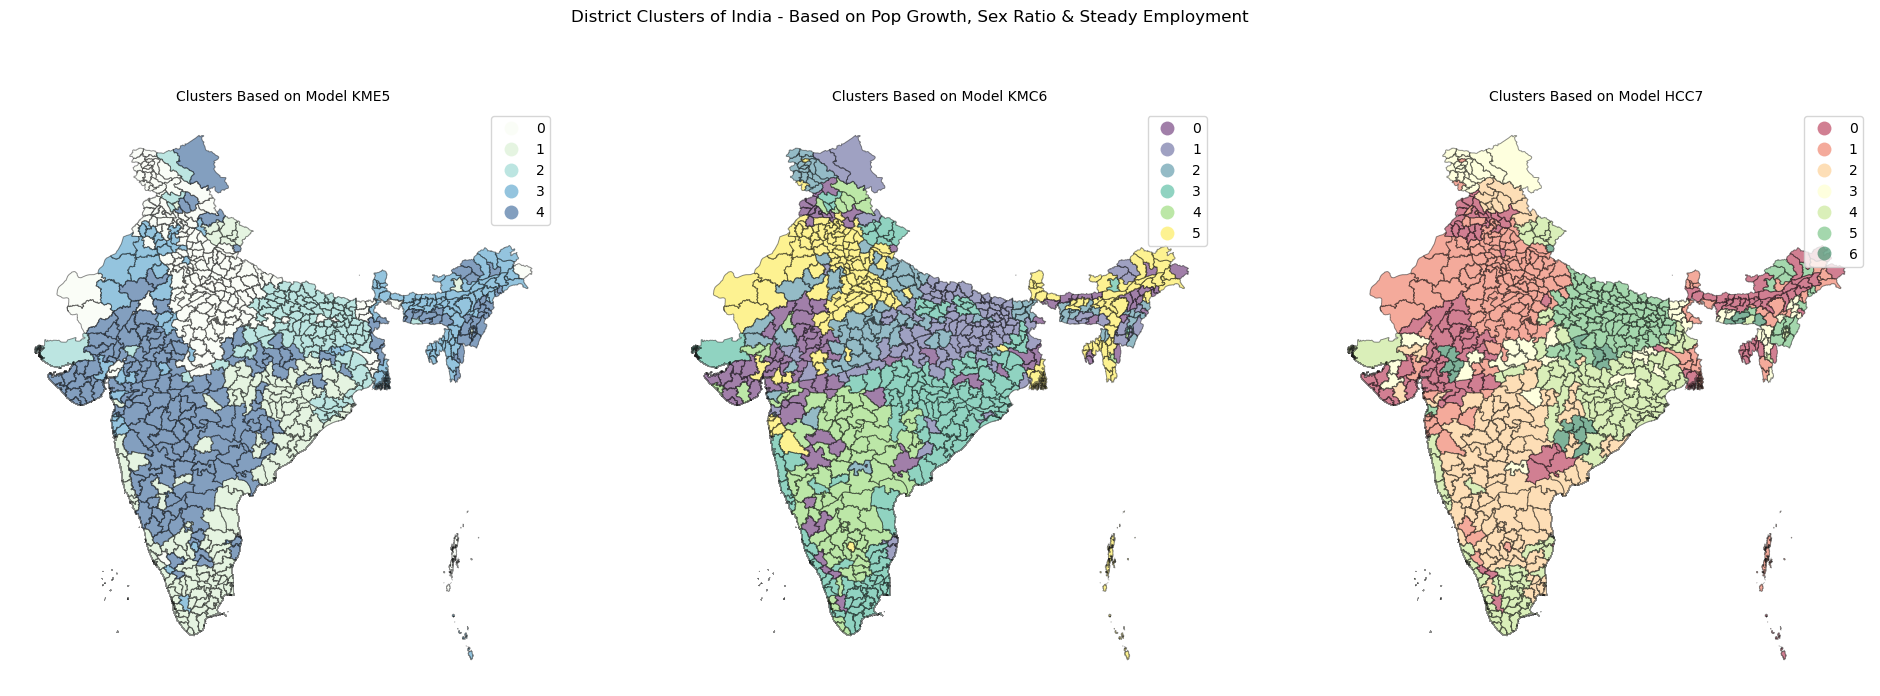

In [25]:
label_cols = ['Label_KME5', 'Label_KMC6', 'Label_HCC7']
colormaps = ['GnBu', 'viridis', 'RdYlGn']
fig, ax = plt.subplots(1, 3, figsize=(24, 8))

for model_label_counter in range(3):
    label_col = label_cols[model_label_counter]
    model = label_col.split('_')[1]
    ax[model_label_counter].axis('off')
    title = f'Clusters Based on Model {model}'
    ax[model_label_counter].set_title(title, fontdict = {'fontsize': '10', 'fontweight' : '3'})
    df_map_wCluster.plot(column = label_col,
                         cmap = colormaps[model_label_counter],
                         linewidth = 0.7,
                         ax = ax[model_label_counter],
                         edgecolor = '0.1',
                         legend = True,
                         categorical = True,
                         alpha = 0.5)
    
fig.suptitle('District Clusters of India - Based on Pop Growth, Sex Ratio & Steady Employment',
             fontdict = {'size': '12', 'weight' : '5'})
plt.show()
plt.savefig('Map_3Clusters.png')
plt.close()

## Interactive (Plotly Choropleth) Plots
The static plot works fine, but isn't very effective in properly communicating the data beyond showing the wider trend. For instance, I wanted to find my home district (Birbhum) and other districts in the same cluster - but as the districts are displayed in very small shapes, I found it hard to find. Although, I don't prefer Plotly for my personal projects (since notebooks can't show the plots inherently, marking them 'Trusted' still doesn't work in Github, plus the notebook sizes go up exponentially) - here that seems to be the sensible choice.

I had struggled to get Plotly work right with our geopandas dataset. Plotly (Choropleth) requires a geojson file to provide the geometry, and list of our desired values - choropleth should be able to match these 2 (sort of JOIN ON) using a 'feature identifier'. The approach I finally got working is probably not the best, but this is the steps I used -
1) Created an ID column by concatenating District and State names in merged map dataset.
2) As per documentation, I should have been able to use the geometry from the geopandas dataset itself (in place of the geojson) with Plotly Express, but somehow that didn't work for me - the plot didn't show up. So, had to create a geojson file with ID and geometry features.
3) The resulting plot still had blank spots. Upon investigating, found that while mapping Choropleth expects the feature identifier (State + District name for us) to be unique for each shape - which was not the case for us, since we had multiple districts sharing the same name (due to district rename, bifurcation etc. since 2011). In such a scenario, the plot colors one of the districts with provided label, and keeps the others blank. Not sure if this is also the reason for point 2 above - didn't investigate as I already had gone the geojson route by that time.
4) To resolve point 3, I could use the newer district names (still present in the geopandas dataframe) to form the ID (and that way it would be unique for each geometry) - but then that would cause a mismatch between our cluster dataset and the map. For instance, Maharashtra's Palghar was created after 2011 by bifurcating Thane - while our cluster dataset has cluster information for Thane only, the map would show 2 districts with Thane's cluster information. While it wouldn't be wrong (the plot above does exactly that, but it doesn't show individual district names - which the Plotly dashboard will), I thought a more logical approach would be to consolidate the districts (which before 2011 were a single entity, dissolve code found at - https://stackoverflow.com/a/60759885/22459343) - that way the map actually represents how it was in 2011, and that is exactly what our data is also based on.

Again, due to size constraints, the plots could not be shown here (or in github) - the code is here, and the plots are available in html format at https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB.

In [26]:
df_map_wCluster = df_map_wCluster.astype({'Label_KME5' : 'category',
                                          'Label_KMC6' : 'category',
                                          'Label_HCC7' : 'category'})
# needed for px to treat clusters as discrete labels
df_map_wCluster['ID'] = df_map_wCluster.DistrictName + ', ' + df_map_wCluster.StateName
df_map_wCluster[['ID', 'geometry']].dissolve(by = 'ID', aggfunc = 'sum').head()

,geometry
ID,
"ADILABAD, ANDHRAPRADESH","POLYGON ((78.33625 19.88319, 78.34669 19.88140..."
"AGRA, UTTARPRADESH","POLYGON ((77.90040 27.26083, 77.90006 27.25176..."
"AHMADABAD, GUJARAT","POLYGON ((72.04340 23.50300, 72.04224 23.49303..."
"AHMADNAGAR, MAHARASHTRA","POLYGON ((74.49038 19.98079, 74.48566 19.97225..."
"AIZAWL, MIZORAM","POLYGON ((92.67405 23.38496, 92.66876 23.39291..."


In [27]:
df_map_wCluster[['ID', 'geometry']].dissolve(by = 'ID', aggfunc = 'sum').\
                            to_file('IndianDistricts.json', driver = 'GeoJSON')
geojson_fp = './IndianDistricts.json'
with open(geojson_fp) as f:
    districts_geojson = json.load(f)

Some words on the dtructure of geojson file - districts_geojson here is a geojson file with unique ID (district name, state name) for each row. Structurally, it's a dictionary with three keys - type, crs, features. The first 2 are essentially metadata, and features contains the 'meat' - so to say. features is a list of dictinaries, where each dictionary belongs to each row we saw above.

I am going to use feature.ID (this is the same ID we saw in each row earlier) as identifier, and would be matched against ID column of merged map dataset (which has non-unique values).

In [28]:
print(f'Datatype of districts_geojson : {type(districts_geojson)}')
print(f'Keys of districts_geojson : {districts_geojson.keys()}')
print(districts_geojson['type'])
print(districts_geojson['crs'])
print('Datatype of features : {}'.format(type(districts_geojson['features'])))
print('Length of features : {}'.format(len(districts_geojson['features'])))
print('Datatype of Elements of features : {}'.format(type(districts_geojson['features'][0])))

Datatype of districts_geojson : <class 'dict'>
Keys of districts_geojson : dict_keys(['type', 'crs', 'features'])
FeatureCollection
{'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}
Datatype of features : <class 'list'>
Length of features : 632
Datatype of Elements of features : <class 'dict'>


In [29]:
print(districts_geojson['features'][0])

{'type': 'Feature', 'properties': {'ID': 'ADILABAD, ANDHRAPRADESH'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[78.33625030517595, 19.883190155029297], [78.34668731689464, 19.881401062011946], [78.36575317382841, 19.88289070129406], [78.37446594238304, 19.879270553589095], [78.38414764404297, 19.879222869873274], [78.3849716186524, 19.873891830444336], [78.38417816162115, 19.863620758056697], [78.38597106933622, 19.855699539184798], [78.38593292236334, 19.852701187133846], [78.38923645019526, 19.846178054809798], [78.39765930175798, 19.836402893066634], [78.40904235839872, 19.829860687255916], [78.42867279052763, 19.82311058044428], [78.4445877075197, 19.819231033325366], [78.46465301513678, 19.816211700439453], [78.47618865966825, 19.81636047363304], [78.48429107666016, 19.80718994140625], [78.48947143554693, 19.798509597778548], [78.49391937255888, 19.79314994812023], [78.50366973876964, 19.792419433594034], [78.50961303710955, 19.801189422607422], [78.5123901367188, 19.814279

Now that I have structure to plot Choropleth maps, first I want to plot the features on maps as animations and then move on to the clusters. For that purpose, I'll need slightly modified datasets.

In [30]:
df_map_wCluster.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 667 entries, 0 to 666
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID_0                     667 non-null    int64   
 1   ISO                      667 non-null    object  
 2   NAME_0                   667 non-null    object  
 3   ID_1                     667 non-null    int64   
 4   NAME_1                   667 non-null    object  
 5   ID_2                     667 non-null    int64   
 6   NAME_2                   667 non-null    object  
 7   HASC_2                   626 non-null    object  
 8   CCN_2                    667 non-null    int64   
 9   CCA_2                    0 non-null      float64 
 10  TYPE_2                   667 non-null    object  
 11  ENGTYPE_2                667 non-null    object  
 12  NL_NAME_2                0 non-null      float64 
 13  VARNAME_2                198 non-null    object  
 14  ge

In [31]:
# Decadal Population Variation
decadal_pop_var_cols = [col for col in df_map_wCluster.columns if col.startswith('Pct_var_since_last')]
df_decadal_var_pop = df_map_wCluster.melt(value_vars = decadal_pop_var_cols,
                                           id_vars = 'ID',
                                           var_name = 'Year')
df_decadal_var_pop['Year'] = df_decadal_var_pop.Year.str.replace('Pct_var_since_last_', '')
# to remove Pct_var_since_last_ from the Year string
df_decadal_var_pop = df_decadal_var_pop.astype({'Year' : int})
df_decadal_var_pop.info()
df_decadal_var_pop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      7337 non-null   object 
 1   Year    7337 non-null   int64  
 2   value   7337 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 172.1+ KB


,ID,Year,value
0,"NICOBARS, ANDAMANNICOBARISLANDS",1911,35.432345
1,"NORTHMIDDLEANDAMAN, ANDAMANNICOBARISLANDS",1911,-2.743249
2,"SOUTHANDAMAN, ANDAMANNICOBARISLANDS",1911,-2.738127
3,"ANANTAPUR, ANDHRAPRADESH",1911,2.743236
4,"CHITTOOR, ANDHRAPRADESH",1911,4.729393
...,...,...,...
7332,"PASCHIMMEDINIPUR, WESTBENGAL",2011,13.864607
7333,"PURBAMEDINIPUR, WESTBENGAL",2011,15.359749
7334,"PURULIYA, WESTBENGAL",2011,15.517308
7335,"SOUTHTWENTYFOURPARGANAS, WESTBENGAL",2011,18.174729


In [32]:
# Decadal Female Pct Variation
decadal_fempct_var_cols = [col for col in df_map_wCluster.columns if col.startswith('Female_pct')]
df_decadal_var_fempct = df_map_wCluster.melt(value_vars = decadal_fempct_var_cols,
                                           id_vars = 'ID',
                                           var_name = 'Year')
df_decadal_var_fempct['Year'] = df_decadal_var_fempct.Year.str.replace('Female_pct_', '')
# to remove Female_pct_ from the Year string
df_decadal_var_fempct = df_decadal_var_fempct.astype({'Year' : int})
df_decadal_var_fempct.info()
df_decadal_var_fempct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004 entries, 0 to 8003
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8004 non-null   object 
 1   Year    8004 non-null   int64  
 2   value   8004 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 187.7+ KB


,ID,Year,value
0,"NICOBARS, ANDAMANNICOBARISLANDS",1901,45.676547
1,"NORTHMIDDLEANDAMAN, ANDAMANNICOBARISLANDS",1901,16.430919
2,"SOUTHANDAMAN, ANDAMANNICOBARISLANDS",1901,16.428764
3,"ANANTAPUR, ANDHRAPRADESH",1901,48.783114
4,"CHITTOOR, ANDHRAPRADESH",1901,49.268351
...,...,...,...
7999,"PASCHIMMEDINIPUR, WESTBENGAL",2011,49.134914
8000,"PURBAMEDINIPUR, WESTBENGAL",2011,48.392886
8001,"PURULIYA, WESTBENGAL",2011,48.909992
8002,"SOUTHTWENTYFOURPARGANAS, WESTBENGAL",2011,48.863049


For the rest of the features, we don't have data throughout the years - Main Workers' data (FemaleMWpct_Rural, FemaleMWpct_Urban, MaleMWpct_Rural, MaleMWpct_Urban, TotMWpct) is just for the final census year (2011), and the Mean of Population Growth & Female Percent (AvgPopGrowth, AvgFemPct) are overall means, so don't belong to any one year in particular. I'll use each of these features themselves as frames.

In [33]:
# Decadal Population Variation
misc_cols = ['FemaleMWpct_Rural', 'FemaleMWpct_Urban', 'MaleMWpct_Rural', 'MaleMWpct_Urban', 'TotMWpct',\
             'AvgPopGrowth', 'AvgFemPct']
df_misc = df_map_wCluster.melt(value_vars = misc_cols,
                                           id_vars = 'ID',
                                           var_name = 'MiscFeatures')
# df_misc = df_misc.astype({'MiscFeatures' : 'category'})
df_misc.info()
df_misc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4669 non-null   object 
 1   MiscFeatures  4669 non-null   object 
 2   value         4669 non-null   float64
dtypes: float64(1), object(2)
memory usage: 109.6+ KB


,ID,MiscFeatures,value
0,"NICOBARS, ANDAMANNICOBARISLANDS",FemaleMWpct_Rural,4.421584
1,"NORTHMIDDLEANDAMAN, ANDAMANNICOBARISLANDS",FemaleMWpct_Rural,4.471718
2,"SOUTHANDAMAN, ANDAMANNICOBARISLANDS",FemaleMWpct_Rural,2.017284
3,"ANANTAPUR, ANDHRAPRADESH",FemaleMWpct_Rural,11.411863
4,"CHITTOOR, ANDHRAPRADESH",FemaleMWpct_Rural,10.472863
...,...,...,...
4664,"PASCHIMMEDINIPUR, WESTBENGAL",AvgFemPct,49.185827
4665,"PURBAMEDINIPUR, WESTBENGAL",AvgFemPct,49.022070
4666,"PURULIYA, WESTBENGAL",AvgFemPct,49.382189
4667,"SOUTHTWENTYFOURPARGANAS, WESTBENGAL",AvgFemPct,47.473110


In [34]:
# Clusters
cluster_label_cols = [col for col in df_map_wCluster.columns if col.startswith('Label')]
df_clusters = df_map_wCluster.melt(value_vars = cluster_label_cols,
                                           id_vars = 'ID',
                                           var_name = 'Model')
df_clusters['Model'] = df_clusters.Model.str.replace('Label_', '')
# to keep just the clustering model
df_clusters = df_clusters.astype({'value' : 'category'})
df_clusters.info()
df_clusters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   ID      2001 non-null   object  
 1   Model   2001 non-null   object  
 2   value   2001 non-null   category
dtypes: category(1), object(2)
memory usage: 33.7+ KB


,ID,Model,value
0,"NICOBARS, ANDAMANNICOBARISLANDS",KME5,3
1,"NORTHMIDDLEANDAMAN, ANDAMANNICOBARISLANDS",KME5,0
2,"SOUTHANDAMAN, ANDAMANNICOBARISLANDS",KME5,0
3,"ANANTAPUR, ANDHRAPRADESH",KME5,4
4,"CHITTOOR, ANDHRAPRADESH",KME5,1
...,...,...,...
1996,"PASCHIMMEDINIPUR, WESTBENGAL",HCC7,4
1997,"PURBAMEDINIPUR, WESTBENGAL",HCC7,4
1998,"PURULIYA, WESTBENGAL",HCC7,4
1999,"SOUTHTWENTYFOURPARGANAS, WESTBENGAL",HCC7,0


In [35]:
fig = px.choropleth(
    data_frame = df_decadal_var_pop,
    geojson = districts_geojson,
    featureidkey = 'properties.ID',
    locations = 'ID',
    color = 'value',
    color_continuous_scale='sunset',
    animation_frame = 'Year',
    projection = 'mercator',
    locationmode='geojson-id',
    width = 750,
    height = 750,
    title = 'Population Variation in Districts of India Through The Years'
)

fig.update_geos(fitbounds = "locations", visible = False)
# fig.show()
# Figure removed from output to reduce notebook size
# ineractive html plots available at https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB
fig.write_html('InteractivePlotsMaps/Map_PopVar.html')

In [36]:
fig = px.choropleth(
    data_frame = df_decadal_var_fempct,
    geojson = districts_geojson,
    featureidkey = 'properties.ID',
    locations = 'ID',
    color = 'value',
    color_continuous_scale='cividis',
    animation_frame = 'Year',
    projection = 'mercator',
    locationmode='geojson-id',
    width = 750,
    height = 750,
    title = 'Female Population Percentage Variation in Districts of India Through The Years'
)

fig.update_geos(fitbounds = "locations", visible = False)
# fig.show()
# Figure removed from output to reduce notebook size
# ineractive html plots available at https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB
fig.write_html('InteractivePlotsMaps/Map_FemPctVar.html')

In [37]:
fig = px.choropleth(
    data_frame = df_misc,
    geojson = districts_geojson,
    featureidkey = 'properties.ID',
    locations = 'ID',
    color = 'value',
    color_continuous_scale='darkmint',
    animation_frame = 'MiscFeatures',
    projection = 'mercator',
    locationmode='geojson-id',
    width = 750,
    height = 750,
    title = 'Variation of Other Features in Districts of India Through The Years'
)

fig.update_geos(fitbounds = "locations", visible = False)
# fig.show()
# Figure removed from output to reduce notebook size
# ineractive html plots available at https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB
fig.write_html('InteractivePlotsMaps/Map_OthersVar.html')

To plot the actual clusters, I'll revert back to the merged master dataset. I tried to plot the clusters in animation as well (with each models as a step), but notebook kernel kept crashing after memory consumption crossed around 8 GB mark - so, decided to plot the clusters separately (static, but still interactive so that the plots can be zoomed in/out as needed, the districts can be identified clearly etc.). In hindsight, that's probably for the best since studying the clusters probably deserves more time - the animation would have looked cooler though. :)

I need to assign category type to the label columns so that Plotly Express may consider them distinct.

In [38]:
df_map_wCluster = df_map_wCluster.astype({'Label_KME5' : 'category',
                                          'Label_KMC6' : 'category',
                                          'Label_HCC7' : 'category'})

colormap_dict = {5 : {0 : 'lightsalmon',
                      1 : 'olivedrab',
                      2 : 'indianred',
                      3 : 'aquamarine',
                      4 : 'cornsilk'},
                 6 : {0 : 'lightsalmon',
                      1 : 'olivedrab',
                      2 : 'indianred',
                      3 : 'aquamarine',
                      4 : 'cornsilk',
                      5 : 'cornflowerblue'},
                 7 : {0 : 'lightsalmon',
                      1 : 'olivedrab',
                      2 : 'indianred',
                      3 : 'aquamarine',
                      4 : 'cornsilk',
                      5 : 'cornflowerblue',
                      6 : 'lime'}}

In [39]:
label_cols = ['Label_KME5', 'Label_KMC6', 'Label_HCC7']
for col in label_cols:
    number_of_clusters = int(col[-1])
    model = col.split('_')[1]
    cat_ord_dict = {5 : {col : [0, 1, 2, 3, 4]},
                    6 : {col : [0, 1, 2, 3, 4, 5]},
                    7 : {col : [0, 1, 2, 3, 4, 5, 6]},}
    labels_dict = {col : 'Cluster Label', 'ID' : 'Dist, State'}
    title_string = 'District Clusters of India Based on Pop Growth, Sex Ratio & Steady Employment'\
                                'as per Model : {}'.format(model)

    fig = px.choropleth(
        data_frame = df_map_wCluster,
        geojson = districts_geojson,
        featureidkey = 'properties.ID',
        locations = 'ID',
        color = col,
        color_discrete_map = colormap_dict[number_of_clusters],
        category_orders = cat_ord_dict[number_of_clusters],
        labels = labels_dict,
        projection = 'mercator',
        locationmode='geojson-id',
        width = 750,
        height = 750,
        title = title_string
    )

    fig.update_geos(fitbounds = "locations", visible = False)
    # fig.show()
    # Figure removed from output to reduce notebook size
    # ineractive html plots available at
    # https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB
    fig.write_html('InteractivePlotsMaps/Map_Clusters_{}.html'.format(model))